# Goal of this project
- We are trying to **predict median house prices** for districts in California. Our **data is labelled** and we are trying to predict a continuous variable. Hence this is a **supervised regression** task.
- We will use a **batch learning approach**, as no data is going to be continuously flowing in, we just have a static dataset.
- This is a **univariate regression** task, as we are just trying to **predict a single outcome**.

# Performance Measure
- We will focus on the root mean squared error **RMSE** metric as this tells us on average how far away were our predicted values to the true values

# Data Exploration

In [26]:
import pandas as pd

In [27]:
# load dataset
df = pd.read_csv("housing.csv")

In [28]:
# view dataset
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [29]:
# basic info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [30]:
# view categorical data
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

- We can see there are 5 different possible values for entries in the ocean_proximity column.

In [31]:
# get basic statistics of dataset
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


- the percentile statistics show the percentage of rows which fall below a given value.
- e.g. 25% of the districts have a housing_median_age of less than 18
- e.g. 50% of the districts have a housing_median_age of less than 29
- Note: each row in this dataset is a district in California

In [32]:
import matplotlib.pyplot as plt

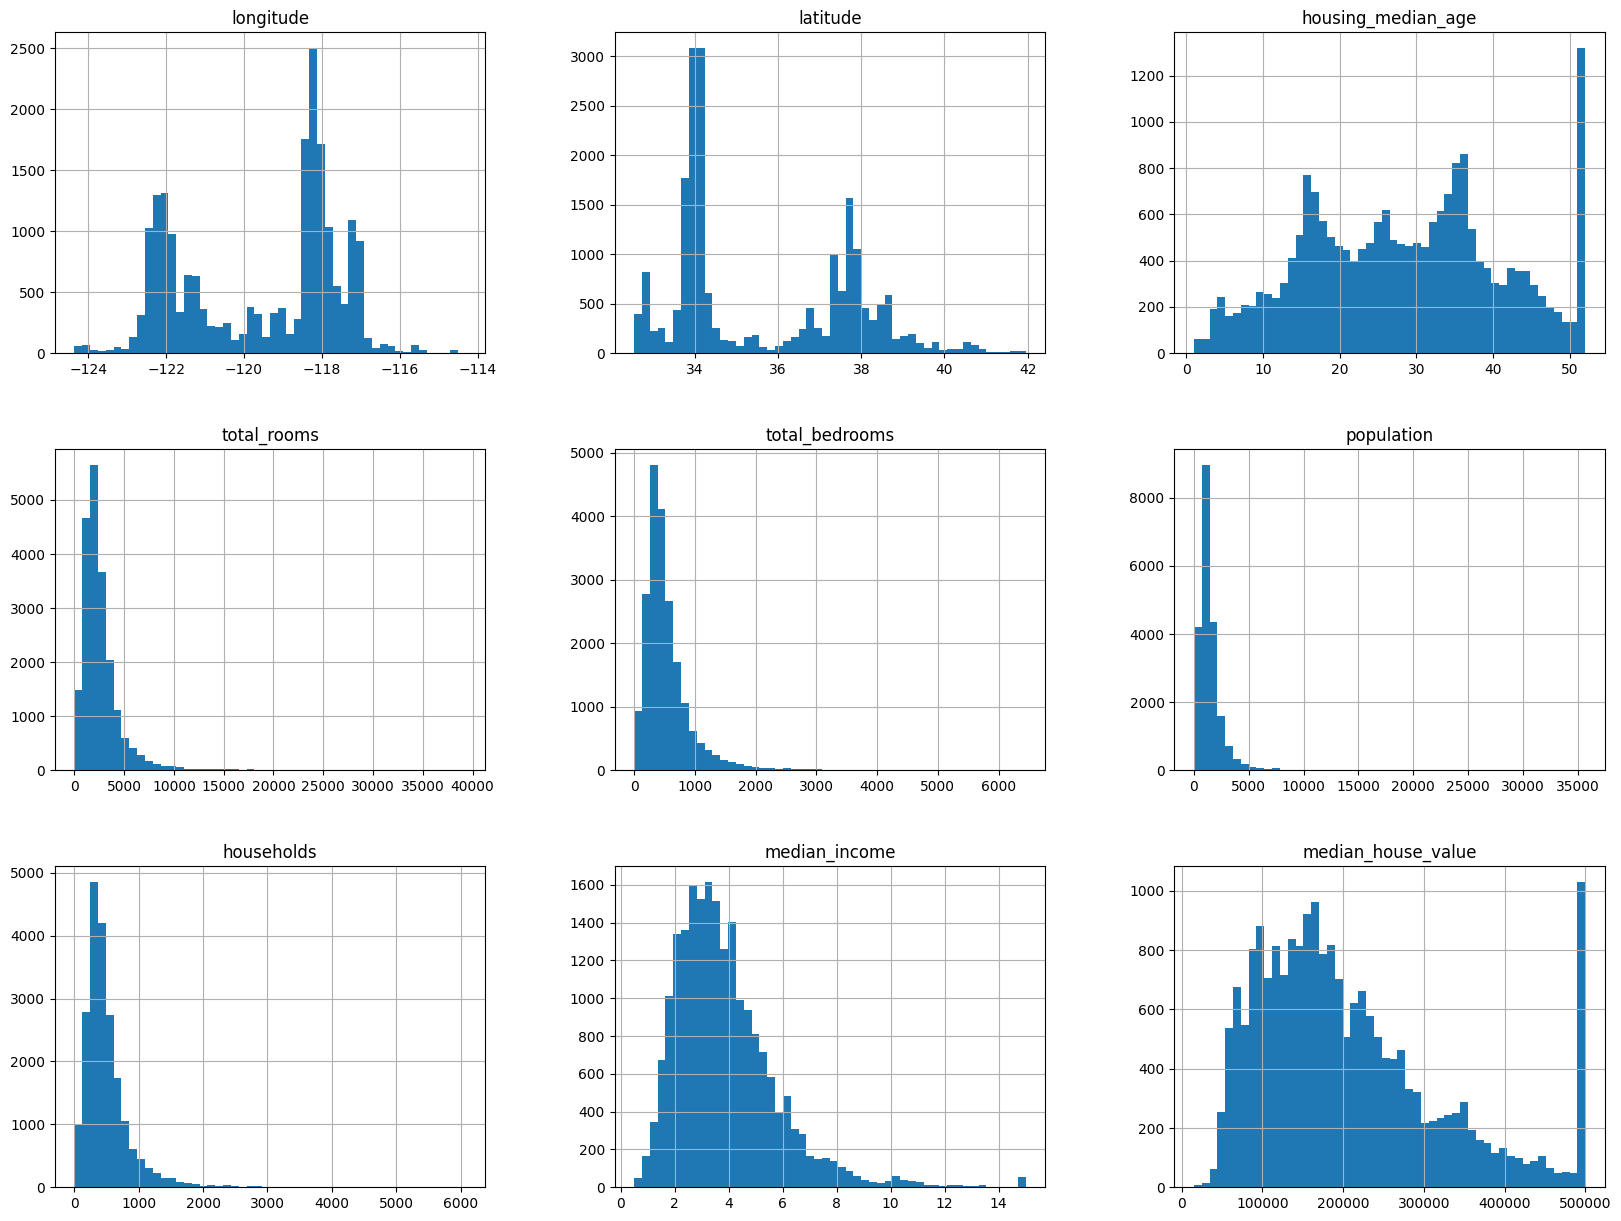

In [33]:
# lets plot histograms of our data to get a better feel for it
df.hist(bins=50, figsize=(20,15))
plt.show()

- These histograms show us the distributions of each feature
- It shows us how many of each value there are
- e.g. There are roughly 1600 districts with a median_income of 2.5 ($25,000)

- We have been told that median incomes have been capped at 15 (150,000). This means if a district has a higher median income that $150,000 then it will be set to 150,000. Also median incomes of less than 0.5 have been rounded up to 0.5

- Housing median age and median house value were also capped

In [34]:
import numpy as np

In [35]:
# this adds an extra column to the dataframe called "income_category"
# it splits median_income values into 5 groups based on their value
# if a median_income is between 0.0 and 1.5 it goes into group 1,
# if a median_income is between 1.5 and 3.0 it goes into group 2 etc
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                               labels=[1, 2, 3, 4, 5])

<Axes: >

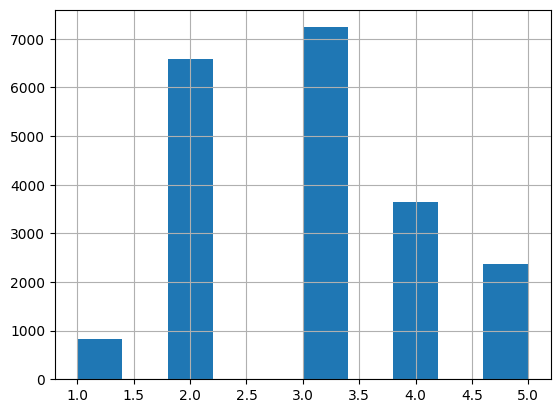

In [36]:
df["income_cat"].hist()

- This histogram now shows how many districts / rows fall into each income category.
- We can see that most districts fall into category 3, i.e. median_income between 30,000 and 45,000

In [37]:
# revert data back to original state
df.drop(columns=["income_cat"], inplace=True)

# Splitting data into train, test splits

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# split data into training and testing splits
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
train_set_copy = train_set.copy()

- Note: train_set and test_set are just the dataframe split up into a 80:20 split, they both contain all features and labels

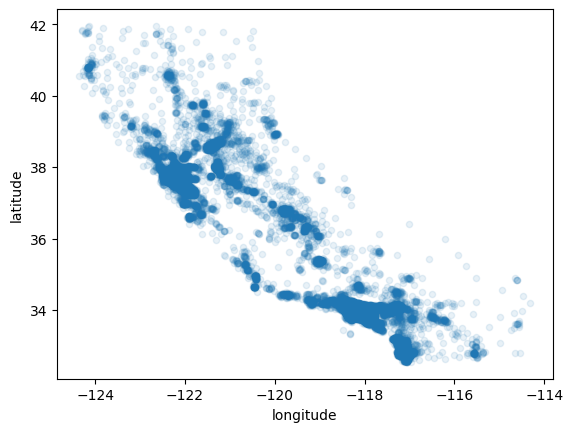

In [40]:
train_set_copy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

- This is a plot of longitude against latitude and it vaguely looks like the shape of the California state.
- Setting alpha=0.1 makes it easier to see where there are high density areas.
- The higher density areas show us where most of the rows / districts are located
- e.g. alot of districts are from the (-117, 32) (longitude, latitude) area
- Comparing this scatter graph to a California map, we can see high density areas represent cities like: Los Angeles, San Diego, San Francisco etc

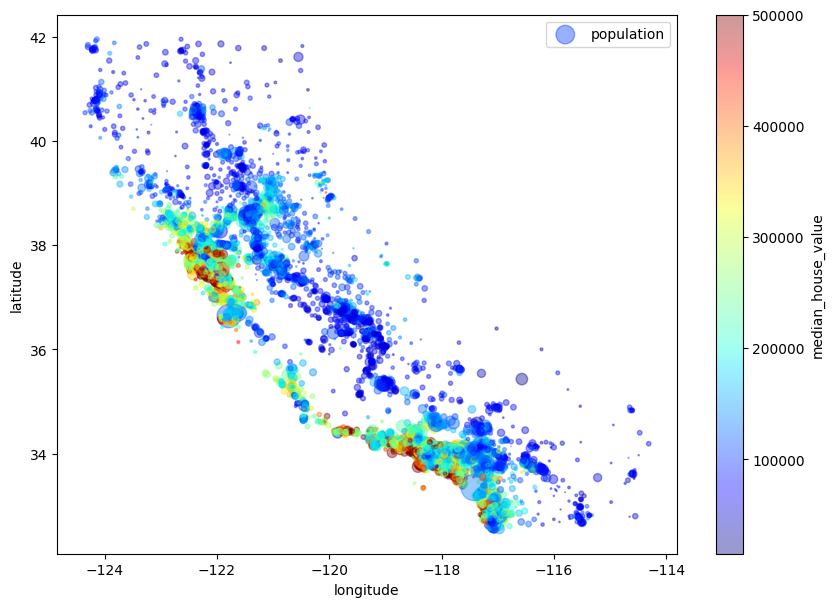

In [41]:
# s: controls size/radius of each point
# c: controls the colour of each point based on a variable
# cmap: controls what colour means what i.e. red = expensive, purple = cheap
# colorbar: shows what the colors mean
train_set_copy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=train_set["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.show()

- This scatter graph shows longitude vs latitude, which roughly outlines the shape of California.
- We look at each row/district in our training set, we plot it on the graph, then the size / radius of that point is determined by the population of the district and its colour is determined by the median_house_value in that district.
- So a large red circle represents a district with a high population and a high median_house_value, whereas a small purple circle represents a low population district with cheap median_house_values

- This scatter graph shows us that housing prices are very much related to their location, as we tend to find all the red circles in specific areas, bunched up together in major cities, near the ocean etc.
- Also the expensive houses are very dense / packed together, so housing prices seem to be realted to population density

In [42]:
# this computes the correlation between all of the numerical attributes
corr_matrix = train_set_copy.drop(columns=["ocean_proximity"]).corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924485,-0.101818,0.038676,0.063064,0.094276,0.049306,-0.017040,-0.046349
latitude,-0.924485,1.000000,0.005296,-0.029224,-0.059998,-0.102499,-0.064061,-0.076571,-0.142983
housing_median_age,-0.101818,0.005296,1.000000,-0.360922,-0.320624,-0.292283,-0.302796,-0.121711,0.103706
total_rooms,0.038676,-0.029224,-0.360922,1.000000,0.930489,0.857936,0.920482,0.198268,0.133989
total_bedrooms,0.063064,-0.059998,-0.320624,0.930489,1.000000,0.878932,0.980255,-0.009141,0.047980
population,0.094276,-0.102499,-0.292283,0.857936,0.878932,1.000000,0.907452,0.004122,-0.026032
households,0.049306,-0.064061,-0.302796,0.920482,0.980255,0.907452,1.000000,0.012776,0.063714
median_income,-0.017040,-0.076571,-0.121711,0.198268,-0.009141,0.004122,0.012776,1.000000,0.690647
median_house_value,-0.046349,-0.142983,0.103706,0.133989,0.047980,-0.026032,0.063714,0.690647,1.000000


In [43]:
# lets take a look at the correlation between median_house_value and all the variables
# values are between -1 and 1 and just show linear correlations
# values near 1 have a strong positive linear correlation, -1 -> strong negative
# values near 0 have near enough no linear correlation
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

In [44]:
from pandas.plotting import scatter_matrix

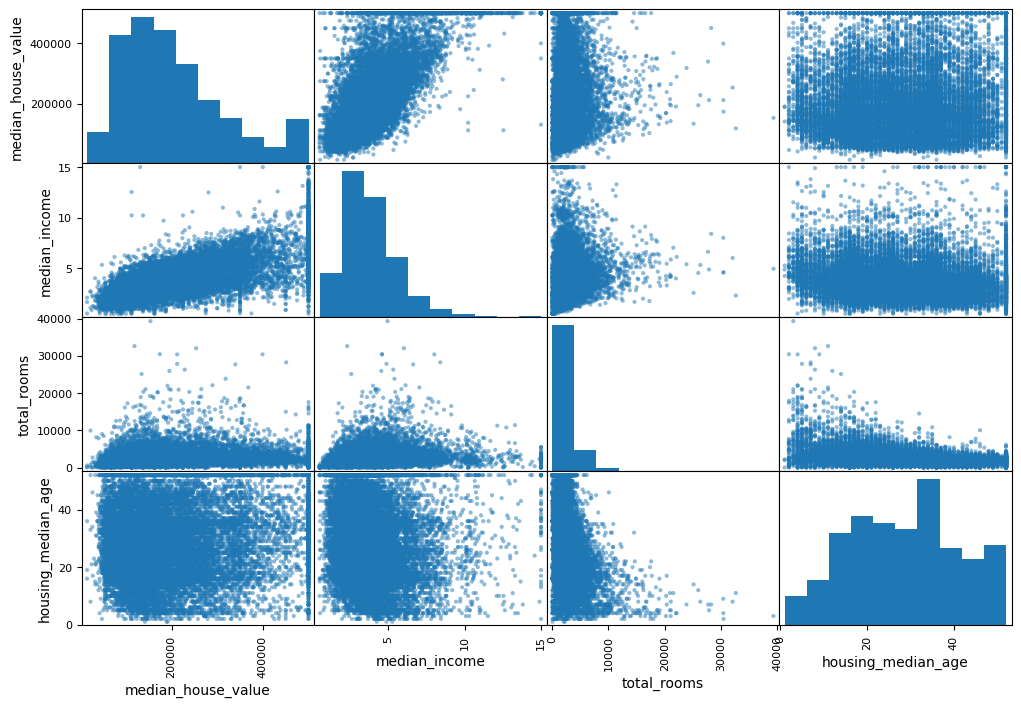

In [45]:
# We can also look at correlations with the pandas scatter matrix function
# it checks for correlations between all pairs of numerical attributes
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(train_set_copy[attributes], figsize=(12, 8))
plt.show()

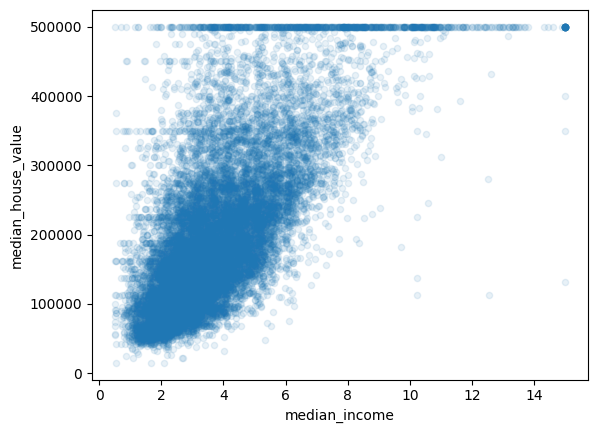

In [46]:
# so far it seems that median_income is the most correlated attribute
# to housing prices so lets focus on that
train_set_copy.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)
plt.show()

- We can clearly see there is a positive linear correlation between median income and housing prices.
- Also the horizontal line at 500,000 is the price cap
- We can also see less obvious price caps / horizontal lines at around 450,000, 350,000 etc

# Feature Engineering

- Lets now have a look at creating some of our own features
- Some of the current features like total_rooms per district and total_bedrooms, do not seem particularly useful.
- Something more useful might be the number of rooms per household or ratio of bedrooms to rooms etc

In [47]:
train_set_copy["rooms_per_household"] = train_set_copy["total_rooms"] / train_set_copy["households"]
train_set_copy["bedrooms_per_room"] = train_set_copy["total_bedrooms"] / train_set_copy["total_rooms"]
train_set_copy["population_per_household"] = train_set_copy["population"] / train_set_copy["households"]

In [48]:
train_set_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,5.017657,0.200576,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,4.473545,0.232703,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,5.645833,0.174486,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,4.002817,0.258269,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,6.268421,0.180940,2.300000


In [49]:
corr_matrix = train_set_copy.drop(columns=["ocean_proximity"]).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms_per_room          -0.257419
Name: median_house_value, dtype: float64

- We can see that bedrooms_per_room is more correlated with median_house_value than total_rooms or bedrooms was. It says houses with a lower bedroom/room ratio are more expensive.
- Also rooms_per_household is more informative than total_rooms, more rooms per house -> more expensive house

# Custom Transformers

- We can write our own classes which act as transformers and then use them in pipelines seamlessly
- We need our class to have 3 methods: fit() which returns self, transform() and fit_transform()
- If our class inherits from TransformerMixin, that gives us the fit_transform() method.
- If we inherit from BaseEstimator, we get access to two more methods, get_params() and set_params() which are useful for hyperparameter tuning

- For example, say we want a transformer which adds in the features we looked at earlier, (rooms_per_household, bedrooms_per_room, population_per_household) etc

In [50]:
from sklearn.base import BaseEstimator, TransformerMixin

In [51]:
# these are the indices of the columns in our dataset
# i.e. total_rooms is column index 3
rooms_idx, bedrooms_idx, population_idx, household_idx = 3, 4, 5, 6

In [52]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        # this controls if we want to add the bedrooms_per_room feature or not
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X: np.ndarray) -> np.ndarray:
        # X is our dataset
        # we create the new feature columns
        # the np.c_ method adds the new columns to the end of the dataset
        rooms_per_household = X[:, rooms_idx] / X[:, household_idx]
        population_per_household = X[:, population_idx] / X[:, household_idx]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_idx] / X[:, rooms_idx]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

- we would make an instance of CombinedAttributesAdder
  ```python
  attribute_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
  ```
- Then do
  ```python
  X_train_with_extra_attributes = attribute_adder.transform(X_train.values)
  ```
- And this will add our extra combined feature columns
- However we can add this to a pipeline to do it with the rest of the data cleaning

# Cleaning data and handling missing values

- We need to deal with missing values and text / categorical data.

In [53]:
# lets take our original training set and deal with missing data
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [54]:
X_train = train_set.drop(columns=["median_house_value"])
y_train = train_set["median_house_value"]

X_test = test_set.drop(columns=["median_house_value"])
y_test = test_set["median_house_value"]

In [55]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

# Streamlining the data cleaning process with Transformation Pipelines

- To clean data we will pass it through a pipeline

In [56]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [57]:
# for numerical attributes, we can have a numerical pipeline
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribute_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

In [58]:
numerical_attribs = list(X_train.drop(columns=["ocean_proximity"]))
categorical_attribs = ["ocean_proximity"]
numerical_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [59]:
# so for eaach column, it looks to see if it is numerical or not, if so it goes
# through the numerical_pipeline, otherwise it gets one hot encoded
full_pipeline = ColumnTransformer([
    ("num", numerical_pipeline, numerical_attribs),
    ("cat", OneHotEncoder(), categorical_attribs)
])

In [60]:
# we call this on our training features
X_train_prepared = full_pipeline.fit_transform(X_train)

- So in our numerical pipeline, we want to fill in all missing data with a median, that is what ("imputer", SimpleImputer(strategy="median")) does.
- Then we add in our extra combined feature columns with ("attribute_adder", CombinedAttributesAdder())
- Then we want to scale all our values, that is what ("std_scaler", StandardScaler()) does.
- The pipeline calls the fit_transform method() on each Transformer in order, in this case SimpleImputer -> StandardScaler
- Before passing data into our model, it must go through the full_pipeline

# Training Models

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [63]:
models = {"Linear Regression" : LinearRegression(),
         "Decision Tree Regressor" : DecisionTreeRegressor(),
         "Random Forest Regressor" : RandomForestRegressor(),
         "Support Vector Machine" : SVR(),}

- lets first test each model on the training data, it just trained on
- the cross_val_score takes the training data, splits into 10 subsets and then trains the model 10 times. Each time, it trains on a random set of 9 of the 10 subsets and evaluates on the last. The result is an array of the 10 evaluation scores
- cross_val_score() is designed to maximise a score, mean_squared_error is a loss function, so we would want to minimise it or maximise its negative, hence scoring="neg_mean_squared_error"

In [65]:
for key in models:
    model = models[key]
    model.fit(X_train_prepared, y_train)
    
    predictions = model.predict(X_train_prepared)
    
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)

    scores = cross_val_score(model, X_train_prepared, y_train, scoring="neg_mean_squared_error",
                             cv=10)
    rmse_scores = np.sqrt(-scores)
    
    print(f"{key} rmse: {rmse}")
    print(f"{key} cross_val_rmse_scores: {rmse_scores}")
    print(f"{key} mean_rmse_score: {rmse_scores.mean()}")
    print(f"{key} standard deviation of rmse scores: {rmse_scores.std()}")
    print("-----------------------------------------")

Linear Regression rmse: 67593.20745775253
Linear Regression cross_val_rmse_scores: [65000.67382615 70960.56056304 67122.63935124 66089.63153865
 68402.54686442 65266.34735288 65218.78174481 68525.46981754
 72739.87555996 68957.34111906]
Linear Regression mean_rmse_score: 67828.38677377408
Linear Regression standard deviation of rmse scores: 2468.091395065224
-----------------------------------------
Decision Tree Regressor rmse: 0.0
Decision Tree Regressor cross_val_rmse_scores: [64616.74372054 71478.72954612 67313.80327247 71266.06267074
 72526.39384583 67791.01935682 66663.64719675 68029.9561723
 64278.30234839 70139.96282536]
Decision Tree Regressor mean_rmse_score: 68410.46209553214
Decision Tree Regressor standard deviation of rmse scores: 2715.701510746486
-----------------------------------------
Random Forest Regressor rmse: 18643.65230666144
Random Forest Regressor cross_val_rmse_scores: [47050.68245878 51651.74490713 49657.16442176 51570.24962575
 52398.90336657 47449.0657506

- for each model the rmse is the score on the training set
- and then the mean_rmse_score is the average rmse after doing cross validation
- we can see that in all of the models the rmse on the training set is lower than the validation sets
- this means our model is overfitting on the training set
- To fix this we can simplify the model, regularize it or get alot more training data
- Here, RandomForestRegressor has performed the best, so lets go foward using this model

# Fine tuning models

- Now that we have a couple models that seem promising, we can play around with hyperparameters to try and maximise its performance
- We could manually change these parameters ourselves but sklearn provides a class for us

In [67]:
from sklearn.model_selection import GridSearchCV

In [82]:
# the keys are hyperparameters in the RandomForestRegressor class
# the code searches for the best combination of hyperparameter values
param_grid = [
    {"n_estimators" : [3, 10, 30], "max_features" : [2, 4, 6, 8]},
    {"bootstrap" : [False], "n_estimators" : [3, 10], "max_features" : [2, 3, 4]}
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=10,
                          scoring="neg_mean_squared_error",
                          return_train_score=True)
grid_search.fit(X_train_prepared, y_train)

,estimator,RandomForestRegressor()
,param_grid,"[{'max_features': [2, 4, ...], 'n_estimators': [3, 10, ...]}, {'bootstrap': [False], 'max_features': [2, 3, ...], 'n_estimators': [3, 10]}]"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,30


- param_grid tells sklearn to first try all 3 x 4 = 12 combinations of n_estimators and max_features, defined in the first dictionary
- So it tries n_estimators=3 and max_features=2, then n_estimators=3 and max_features=4 etc
- Then try all 2 x 3 = 6 combinations of hyperparameter values in the second dictionary but this time with bootstrap set to false instead of true
- So each dictionary is a set of all hyperparameter values to try
- In total 12 + 6 = 18 combinations of hyperparameter values are tried and it will train each model 5 times, since we are using cv=5 (cross_validation = 5)
- Therefore 90 rounds of training

In [83]:
# check best hyperparameter values
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [84]:
# this is the complete model with all the best hyperparameter values
grid_search.best_estimator_

,n_estimators,30
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,8
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [85]:
grid_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_features', 'param_n_estimators', 'param_bootstrap', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])

- cv_results_ is a dictionary mapping statistics about how the model performed with each combination of hyperparameters
- we want to look at mean_test_score and the corresponding parameters which got that score
- we do np.sqrt(-mean_score) to get the RMSE values
- and we can see the lowest RMSE was achieved with {'max_features': 8, 'n_estimators': 30}, which are grid_search.best_params_ values

In [86]:
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(np.sqrt(-mean_score), params)

62831.869959292184 {'max_features': 2, 'n_estimators': 3}
54779.20749664967 {'max_features': 2, 'n_estimators': 10}
51928.15464183881 {'max_features': 2, 'n_estimators': 30}
60434.22530812388 {'max_features': 4, 'n_estimators': 3}
52154.279312002705 {'max_features': 4, 'n_estimators': 10}
49764.23805155291 {'max_features': 4, 'n_estimators': 30}
58541.6351927846 {'max_features': 6, 'n_estimators': 3}
51464.31823560738 {'max_features': 6, 'n_estimators': 10}
49457.78276746953 {'max_features': 6, 'n_estimators': 30}
57926.01991218794 {'max_features': 8, 'n_estimators': 3}
51578.392370327 {'max_features': 8, 'n_estimators': 10}
49432.59352575984 {'max_features': 8, 'n_estimators': 30}
61636.8011126686 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53380.32482691143 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59317.27326129081 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51579.780434778884 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

- Above we used GridSearchCV, we can also search for optimal hyperparameters using a randomized search. This is better when we would have more combinations of hyperparameters to try.
- RandomSearchCV tries random combinations of hyperparameters a given number of times.
- e.g. if we did 1000 tries, RandomSearchCV tries 1000 different values for each hyperparameter, instead of just a few with gridsearch i.e. on the first few tries in our above example, max_features stayed at 2

- Another way to improve our model is to use Ensemble methods. This means to combine multiple models.

In [95]:
# our random forest model can tell us how important each feature was
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.93245298e-02, 5.85170860e-02, 4.31962965e-02, 1.47223272e-02,
       1.44763797e-02, 1.43984732e-02, 1.34600166e-02, 3.47873395e-01,
       4.93428407e-02, 1.10787402e-01, 8.01011374e-02, 4.08616751e-03,
       1.73672094e-01, 7.83472392e-05, 2.40365004e-03, 3.55985712e-03])

In [48]:
# shows the importance of each feature
# with this we could try dropping features, which are less important
extra_attribs = ["rooms_per_household", "pop_per_household", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = numerical_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(np.float64(0.35721810309524155), 'median_income'),
 (np.float64(0.14674155791708812), 'INLAND'),
 (np.float64(0.11146746684397195), 'pop_per_household'),
 (np.float64(0.07313374922491014), 'longitude'),
 (np.float64(0.06410394924720571), 'latitude'),
 (np.float64(0.0629431228393992), 'bedrooms_per_room'),
 (np.float64(0.060879403405184815), 'rooms_per_household'),
 (np.float64(0.040930932534135364), 'housing_median_age'),
 (np.float64(0.016363900294098753), 'total_rooms'),
 (np.float64(0.016304025510395108), 'population'),
 (np.float64(0.015948957435687732), 'total_bedrooms'),
 (np.float64(0.015671797247955775), 'households'),
 (np.float64(0.010769533590334637), '<1H OCEAN'),
 (np.float64(0.0043313040310906355), 'NEAR OCEAN'),
 (np.float64(0.003010482751380239), 'NEAR BAY'),
 (np.float64(0.00018171403192040558), 'ISLAND')]

# Evaluating System on Test Set

In [115]:
final_model = grid_search.best_estimator_

In [109]:
# do not call fit_transform() as that would replace values with median from test set!
X_test_prepared = full_pipeline.transform(X_test)

In [110]:
final_predictions = final_model.predict(X_test_prepared)

In [116]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(f"final_rmse = {final_rmse}")

final_rmse = 49974.63460289723


In [117]:
from scipy import stats

In [125]:
# this gives a 95% confidence interval that our true RMSE lies in
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([47761.20772954, 52094.09989243])

# Conclusion
- Of the models we tried, **RandomForestRegressor** performed the best on achieved a **RMSE of 49974** on the testing data
- This means on average our model is off by $49974 when predicting median_house_value for a given district in California